Usando el archivo `datos.csv` resuelva las siguientes preguntas. Para los cálculos use el lenguage Python. El archivo contiene 10 variables independientes y una variable de salida. No todas las variables independientes son relevantes. La variable de salida indica la clase a la que pertenece cada uno de los ejemplos.

# Pregunta 1

Si se usa un algoritmo de detección de grupos (como k-means), el algoritmo es capaz de detectar los grupos existentes y asignar correctamente los registros a cada grupo? Podría escogerse un subconjunto de variables independientes para mejorar la detección de grupos? argumente.

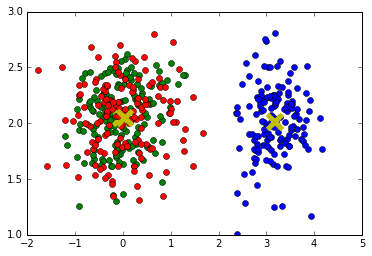

In [110]:
from sklearn import cluster
import numpy as np
import pandas as pd
from matplotlib import pyplot
%matplotlib inline


#Se leen los datos
data=pd.read_table('datos.csv',
                   sep = ',',
                   decimal = '.',
                   thousands = None,
                   header=0
                  )
#Se define como matriz
data = data.as_matrix()
data = np.matrix(data)



k = 3                                    #Cantidad de Centroides (Clusters)
kmeans = cluster.KMeans(n_clusters=k)    #Definición del modelo
kmeans.fit(data[:,:-1])                  #Ejecución del modelo


labels = kmeans.labels_
centroids = kmeans.cluster_centers_




for i in range(k):
    # Selecciona las observaciones con el clustar i 
    ds = data[np.where(labels==i)]
    # plot de las observaciones
    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot del centroide
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # Configurar formato de Centroides
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=5.0)
    pyplot.setp(lines,color='y')
pyplot.show()

# http://fromdatawithlove.thegovans.us/2013/05/clustering-using-scikit-learn.html

# Pregunta 2

Constuya un sistema clasificador que permita asignar un nuevo punto a una de las tres clases. El clasificador debe usar internamente la regresión logística. Es posible detectar las variables relevantes independientes usando regresión  logística? 

In [31]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd

#Se leen los datos
data=pd.read_table('datos.csv',
                   sep = ',',
                   decimal = '.',
                   thousands = None,
                   header=0
                  )

# Se convierte a matriz
data = data.as_matrix()
data = np.matrix(data)

data

#Se define la semilla
np.random.seed(123)

#Se crea el conjunto de entrenamiento y prueba  70% y 30%
m_train    = np.random.rand(len(data)) < 0.7
data_train = data[m_train,]
data_test  = data[~m_train,]

#Se definen las clases de entrenamiento y prueba
clase_train = data_train[:,-1]

clase_train = clase_train.A1 #convierte de matriz a vector 
clase_test  = data_test[:,-1]
clase_test  = clase_test.A1 #convierte de matriz a vector 

#ENTRENAMIENTO
modelo_lr = LogisticRegression()
modelo_lr.fit(X=data_train[:,:-1],y=clase_train)


# PREDICCION
predicion = modelo_lr.predict(data_test[:,:-1])


# METRICAS
print(metrics.classification_report(y_true=clase_test, y_pred=predicion))
print(pd.crosstab(data_test[:,-1].A1, predicion, rownames=['REAL'], colnames=['PREDICCION']))


             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        38
        2.0       1.00      1.00      1.00        46
        3.0       1.00      1.00      1.00        40

avg / total       1.00      1.00      1.00       124

PREDICCION  1.0  2.0  3.0
REAL                     
1.0          38    0    0
2.0           0   46    0
3.0           0    0   40


# Pregunta 3

Construya un sistema clasificador usando la técnica de vecinos más próximos. Cómo podría modificar el algoritmo para detectar las variables más relevantes?

In [20]:

#Importación de librerias
import random
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier


#Se leen los datos
data=pd.read_table('datos.csv',
                   sep = ',',
                   decimal = '.',
                   thousands = None,
                   header=0
                  )

# Se convierte a Matriz
data = data.as_matrix()
data = np.matrix(data)

# Se define la semilla
np.random.seed(123)

# Se dividen los conjuntos de Prueba y Entrenamiento 30% y 70%
m_train    = np.random.rand(len(data)) < 0.7
data_train = data[m_train,]
data_test  = data[~m_train,]



##other  https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
##       https://www.dataquest.io/blog/k-nearest-neighbors-in-python/




# Se cargan los datos
df = pd.read_csv('datos.csv', header=0)
df.head()
df.ix[:, 0:10]


# Se crean la matrix con las variables
X = np.array(df.ix[:, 0:10]) 
#Se crea arreglo con la clase a la cual pertenese
y = np.array(df['class']) 

# se definien los conjuntos de Prueba y Entrenamiento tanto para las variables como para las calses 33% y 67%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    

# Se instancia el modelo para validarlo 3 vecinos
knn = KNeighborsClassifier(n_neighbors=3)

# Se realiza el entrenamiento del modelo con las variables y clases de prueba
knn.fit(X_train, y_train)

# Se realiza la predición con el conjutno de prueba
pred = knn.predict(X_test)

# Se evalua el error cuadratico
mse = (((pred - y_test) ** 2).sum()) / len(pred)
print ('Error Cuadrático: ', mse)

# Medida de exactitud de modelo
#accuracy=accuracy_score(y_test, pred)    #The best performance is 1 
#print ('Medida de exactitud de modelo: ', accuracy)

Error Cuadrático:  0.0


# Pregunta 4

Construya un sistema clasificador usando árboles de decisión. Ya que los árboles permiten detectar variables relevantes, las variables seleccionadas en este punto coinciden con las obtenidas en las preguntas anteriores?

In [127]:
from sklearn import tree
import numpy as np
import pandas

data    = pandas.read_csv('datos.csv',  # el archivo
                    sep = ',',         # separador de campos
                    thousands = None,  # separador de miles para números
                    decimal = '.')     # separador de los decimales para números
data = data.as_matrix()
data = np.matrix(data)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(data[:,:-1], data[:,-1])
clf


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

---